In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
from datetime import datetime

In [34]:
mypath = r"Stats"
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

#onlyfiles = [f for f in onlyfiles if "icetest" in f]
print(onlyfiles)

['ekjlk_Profile5_22_10_04__01_35.csv', 'firstPrototype_profile0_22_08_23__17_24.csv', 'firstprototype_profile2_22_08_23__17_18.csv', 'icetest_Profile0_22_10_06__17_44.csv', 'icetest_Profile1_22_10_06__17_44.csv', 'icetest_Profile2_22_10_06__00_45.csv', 'icetest_Profile2_22_10_06__01_38.csv', 'icetest_Profile2_22_10_06__16_56.csv', 'icetest_Profile2_22_10_06__17_04.csv', 'icetest_Profile2_22_10_06__17_21.csv', 'icetest_Profile2_22_10_06__17_43.csv', 'icetest_Profile2_22_10_06__17_44.csv', 'icetest_Profile2_22_10_06__17_56.csv', 'icetest_Profile2_22_10_07__00_44.csv', 'icetest_Profile2_22_10_07__01_08.csv', 'icetest_Profile2_22_10_07__01_51.csv', 'icetest_Profile3_22_10_06__00_36.csv', 'icetest_Profile3_22_10_06__00_41.csv', 'icetest_Profile3_22_10_06__00_43.csv', 'icetest_Profile3_22_10_06__00_45.csv', 'icetest_Profile3_22_10_06__01_34.csv', 'icetest_Profile3_22_10_06__16_36.csv', 'icetest_Profile3_22_10_06__16_56.csv', 'icetest_Profile3_22_10_06__17_44.csv', 'icetest_Profile4_22_10_06_

In [35]:
#df = pd.read_csv(os.path.join(mypath, onlyfiles[0]))
df = pd.read_csv(os.path.join(mypath, "icetest_Profile2_22_10_07__01_51.csv"))
#preprocess gametime

t = np.array(df["Time"], )
t = t.astype(datetime)

t = np.array([datetime.strptime(my_date_string, '%Y-%m-%d %H:%M:%S.%f') for my_date_string in t])

start_time = t[0]
t = t - start_time

t = np.array([int(timesince.total_seconds()) for timesince in t]) 
df["GameTime"] = t
df

,Unnamed: 0,Player,Profile,Time,Event,GameTime
0,0,icetest,Profile2,2022-10-07 01:51:52.923598,hp 138,0
1,1,icetest,Profile2,2022-10-07 01:51:52.926599,armor 17,0
2,2,icetest,Profile2,2022-10-07 01:51:52.936601,hp 138,0
3,3,icetest,Profile2,2022-10-07 01:51:52.938602,armor 17,0
4,4,icetest,Profile2,2022-10-07 01:51:52.947604,hp 138,0
...,...,...,...,...,...,...
6299,6299,icetest,Profile2,2022-10-07 02:11:41.950968,Session_total_downed 2,1189
6300,6300,icetest,Profile2,2022-10-07 02:11:41.952968,Session_total_kills 291,1189
6301,6301,icetest,Profile2,2022-10-07 02:11:41.955969,Session_total_head_shots 68,1189
6302,6302,icetest,Profile2,2022-10-07 02:11:41.957970,Session_total_specials_kills 44,1189


enemies killed 291


Text(0.5, 0, 'Time')

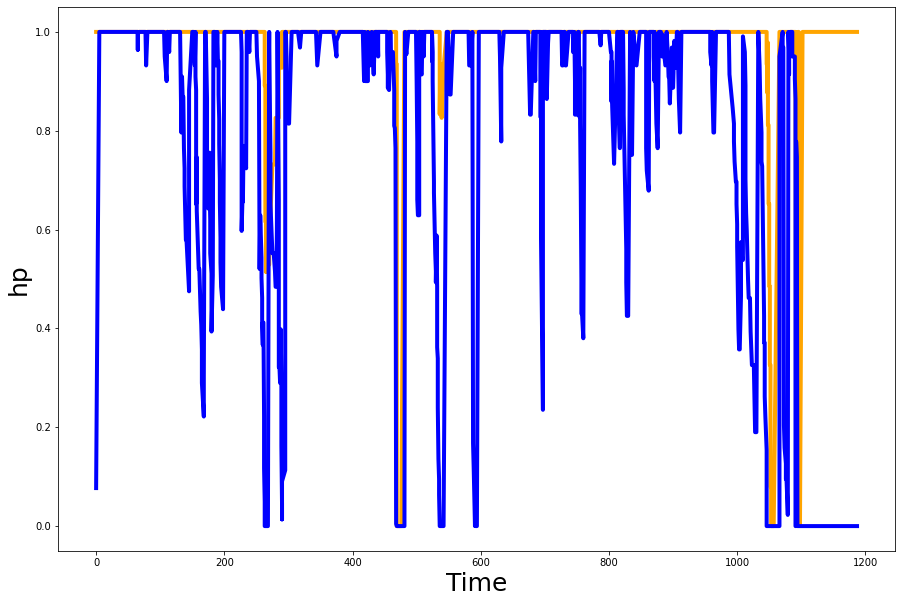

In [36]:
fig, ax=plt.subplots(figsize=(15,10))

#killed enemies
df_deaths_enemy = df.loc[df["Event"].str.contains("killed an enemy", case = False)]
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='black')


print(f"enemies killed", len(df_deaths_enemy["GameTime"]))

# player hp
df_hp = df.loc[df["Event"].str.contains("hp", case = False)]
hp = np.array([int(ev.replace("hp ","")) for ev in df_hp["Event"]])
hp_max = np.max(hp)
hp = hp/hp_max
ax.plot(df_hp["GameTime"], hp, label="hp", linewidth=4.0, color='orange')

# player armor
df_hp = df.loc[df["Event"].str.contains("armor", case = False)]
df_hp = df_hp.loc[~df_hp["Event"].str.contains("regenerate armor", case = False)]
armor = np.array([int(ev.replace("armor ","")) for ev in df_hp["Event"]])
armor_max = np.max(armor)
ax.plot(df_hp["GameTime"], armor/armor_max, label="armor", linewidth=4.0, color='blue')


#ax.plot(x,y, linewidth=10.0, color='black', label="Average", zorder=2)
ax.set_ylabel(f"hp", fontsize=25)
ax.set_xlabel(f"Time", fontsize=25)

In [39]:
events= ("enemy_hit", "enemy_headshot", "enemy_crit", "killed an enemy", "shielded hit", "unshielded hit", "auto regenerate armor", "downed")

for e in events:
    df_event = df.loc[df["Event"]==e]
    print(e, len(df_event))

enemy_hit 0
enemy_headshot 74
enemy_crit 0
killed an enemy 291
shielded hit 261
unshielded hit 20
auto regenerate armor 86
downed 2


In [30]:
events= ("revived by ally", "auto replenish health", "auto regenerate armor", "unshielded hit", "tased", "shielded hit", "complete_objective", "activate_objective")

for e in events:
    df_event = df.loc[df["Event"]==e]
    print(e, len(df_event))

revived by ally 5
auto replenish health 0
auto regenerate armor 98
unshielded hit 7
tased 4
shielded hit 206
complete_objective 0
activate_objective 0


In [62]:
df_event = df.loc[df["Event"].str.contains("weapon_fired", case = False)]
print("weapon_fired", len(df_event))
l = np.array(df_event["Event"])
l = np.array([st.split(" ")[-1] for st in l], int).astype(int)
print("hits",l.sum())
print("accuracy is ", l.sum()/len(df_event))


weapon_fired 1689
hits 446
accuracy is  0.2640615748963884


In [31]:
#player take damage
df_deaths_enemy = df.loc[df["Event"]=="shielded hit"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "blue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='blue')

df_deaths_enemy = df.loc[df["Event"]=="unshielded hit"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "orange")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='orange')

df_deaths_enemy = df.loc[df["Event"]=="auto regenerate armor"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t,color = "lightblue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='blue')

df_deaths_enemy = df.loc[df["Event"]=="revived by ally"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t,color = "lightblue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='lightblue')

df_deaths_enemy = df.loc[df["Event"]=="downed"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "black")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='black')